<h1>Exploratory Data Analysis</h1>

<h2>Data Extraction</h2>

In [0]:
import os

#find image folders
os.chdir('..')
os.chdir('COVID-CT/Images-processed')
cwd = os.getcwd()

#initialize data dictionary
data = {}

#iterate over covid and noncovid ct directories
for (root,dirs,files) in os.walk(cwd): 
    if dirs: 
        for dataset in dirs: 
            print(dataset)
            for (root,dirs,files) in os.walk(os.path.join(cwd,dataset)): 
                
                #add scans to corresponding datasets in data dictionary
                if dataset == "CT_COVID": 
                    data["CT_COVID"] = files 
                elif dataset == "CT_NonCOVID": 
                    data["CT_NonCOVID"] = files
            

CT_COVID
CT_NonCOVID
mid_slices
Lungx-Ct025
Lungx-Ct022
Lungx-Ct014
Lungx-Ct013
Ct-Training-Be010
Lungx-Ct047
Lungx-Ct040
Lungx-Ct049
Lungx-Ct012
Lungx-Ct015
Lungx-Ct023
Lungx-Ct024
Lungx-Ct048
Lungx-Ct041
Lungx-Ct046
Lungx-Ct055
Ct-Training-Be002
Lungx-Ct052
Lungx-Ct039
Lungx-Ct006
Lungx-Ct001
Lungx-Ct008
Lungx-Ct037
Lungx-Ct030
Lungx-Ct053
Lungx-Ct054
Lungx-Ct031
Lungx-Ct009
Lungx-Ct036
Lungx-Ct038
Lungx-Ct007
Ct-Training-Lc002
Ct-Training-Lc003
Lungx-Ct043
Lungx-Ct044
Lungx-Ct021
Lungx-Ct026
Lungx-Ct019
Lungx-Ct010
Lungx-Ct017
Lungx-Ct028
Lungx-Ct045
Lungx-Ct042
Lungx-Ct016
Lungx-Ct029
Lungx-Ct011
Lungx-Ct027
Lungx-Ct018
Lungx-Ct020
Lungx-Ct002
Lungx-Ct005
Lungx-Ct033
Lungx-Ct034
Lungx-Ct060
Lungx-Ct058
Lungx-Ct051
Ct-Training-Be006
Lungx-Ct056
Lungx-Ct035
Lungx-Ct032
Lungx-Ct004
Lungx-Ct003
Lungx-Ct057
Lungx-Ct050
Ct-Training-Be007
Lungx-Ct059
Ct-Training-Lc001
Ct-Training-Lc008
Ct-Training-Lc009
Ct_Infused_Chest__18111
HIRES_7951
Ct_Infused_Chest__6501
HIGH_RES_4
Ct_Infused_Chest_

<h2>Dataframe Setup</h2>

349
Example CT_COVID Scan


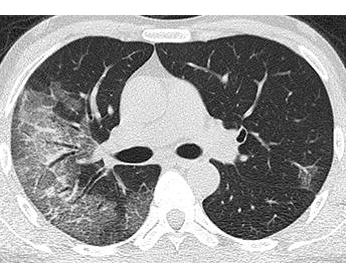

397
Example CT_NonCOVID Scan


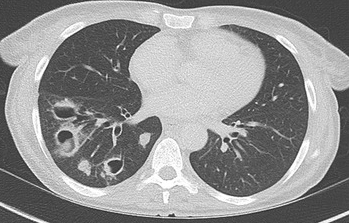

                                               Image Height Width Resolution  \
0                 2020.03.01.20029769-p21-73_1%1.png    269   346      93074   
1  Recurrence-of-positive-SARS-CoV-2-RNA-in-C_202...    473   627     296571   
2                   2020.03.12.20034686-p17-91-4.png    406   572     232232   
3                  2020.02.25.20021568-p24-111%8.png     98   115      11270   
4                    2020.03.13.20035212-p23-153.png    278   417     115926   

   Mode Format Palette  
0   RGB    PNG    None  
1   RGB    PNG    None  
2  RGBA    PNG    None  
3  RGBA    PNG    None  
4     L    PNG    None  
      Image Height Width Resolution Mode Format Palette
0    77.jpg    223   349      77827  RGB   JPEG    None
1   412.png    372   450     167400  RGB    PNG    None
2   4%7.jpg    143   189      27027  RGB   JPEG    None
3  40%0.jpg    327   386     126222  RGB   JPEG    None
4    88.jpg    632   756     477792    L   JPEG    None


In [0]:
from PIL import Image 
from time import sleep
import pandas as pd
from IPython.display import Image as IM

#create metadata dataframes with pandas
covid_df = pd.DataFrame(columns=['Image','Height', 'Width', 'Resolution','Mode','Format','Palette'])
nonCovid_df = pd.DataFrame(columns=['Image','Height', 'Width', 'Resolution','Mode','Format','Palette'])

#store dataframes in dataframe dictionary
df_map = {'CT_COVID':covid_df, 'CT_NonCOVID':nonCovid_df}

#iterate through data dictionary
for dataset in data.keys():
    
    #select corresponding dataframe (covid or noncovid)
    df = df_map[dataset]
    
    #set path to scans
    path = os.path.join(cwd,dataset)
    
    #iterate through each scan and add to corresponding dataframe
    index = 0
    print(len(data[dataset]))
    for scan in data[dataset]:
        
        #open image
        img = Image.open(os.path.join(path,scan))
        
        #visualize one COVID-19 and NonCOVID-19 scan
        if index == 0:
         
            print("Example " + dataset + " Scan")
            display(IM(filename=os.path.join(path,scan)))
            
        #extract features
        width, height = img.size
        res = width*height
        mode = img.mode
        form = img.format
        pal = img.palette
       
        #add to corresponding dataframe
        df.loc[index] = scan, height,width, res, mode, form, pal
        
        #next index
        index += 1
        
#save dataframes as csv files
df_map['CT_COVID'].to_csv('COVID_CT_metada.csv')
df_map['CT_NonCOVID'].to_csv('NonCOVID_CT_metada.csv')

# # visualize dataframes
print(df_map['CT_COVID'].head())
print(df_map['CT_NonCOVID'].head())

<h2>Visualize Scan Height Across Datasets</h2>

CT_COVID mean: 301.7106017191977
CT_NonCOVID mean: 303.2947103274559


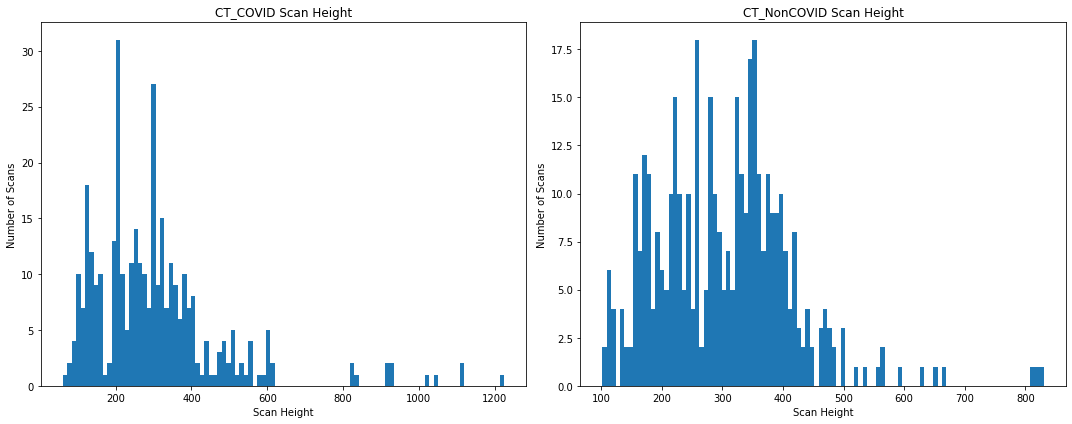

In [0]:
import matplotlib.pyplot as plt
import statistics

#create subplots for both covid and noncovid data
fig, ax = plt.subplots(1, 2, tight_layout=True,figsize=(15,6))

#iterate through each dataframe and plot data
plot_number = 0
for metadata in df_map.keys():
    
    #plot data
    data = df_map[metadata]['Height']
    print(str(metadata) + " mean: " + str(statistics.mean(data)))
    ax[plot_number].hist(data,bins=100)
    
    #set plot title
    title = metadata + " Scan Height"
    ax[plot_number].set_title(title)
    
    #next plot
    plot_number += 1
    
#set axes labels
for ax in ax.flat:
    ax.set(xlabel="Scan Height", ylabel='Number of Scans')

#render plot
plt.show()

<h2>Visualize Scan Width Across Datasets</h2>

CT_COVID mean: 429.69054441260744
CT_NonCOVID mean: 421.7833753148615


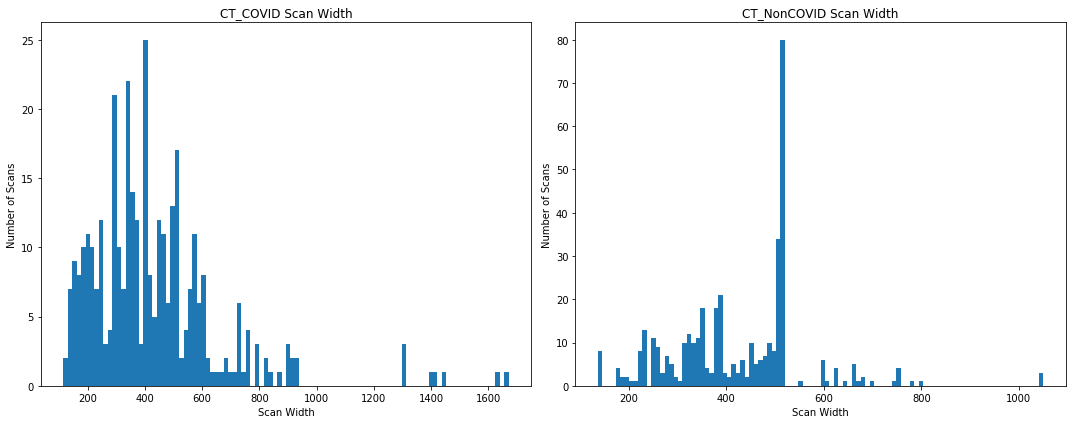

In [0]:
import matplotlib.pyplot as plt
import statistics

#create subplots for both covid and noncovid data
fig, ax = plt.subplots(1, 2, tight_layout=True,figsize=(15,6))

#iterate through each dataframe and plot data
plot_number = 0
for metadata in df_map.keys():
    
    #plot data
    data = df_map[metadata]['Width']
    print(str(metadata) + " mean: " + str(statistics.mean(data)))
    ax[plot_number].hist(data,bins=100)
    
    #set plot title
    title = metadata + " Scan Width"
    ax[plot_number].set_title(title)
    
    #next plot
    plot_number += 1
    
#set axes labels
for ax in ax.flat:
    ax.set(xlabel="Scan Width", ylabel='Number of Scans')

#render plot
plt.show()

<h2>Visualize Scan Resolution Across Datasets</h2>

CT_COVID mean: 168925.6189111748
CT_NonCOVID mean: 142299.70528967254


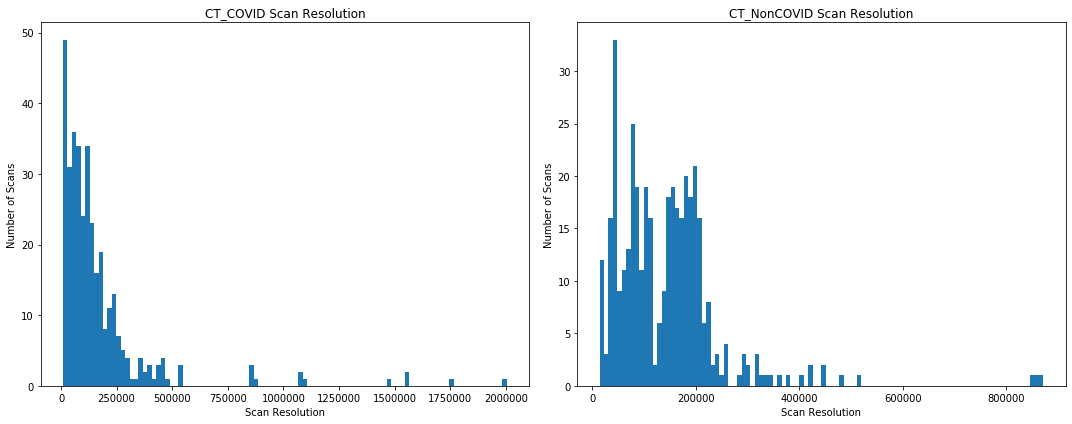

In [0]:
import matplotlib.pyplot as plt
import statistics

#create subplots for both covid and noncovid data
fig, ax = plt.subplots(1, 2, tight_layout=True,figsize=(15,6))

#iterate through each dataframe and plot data
plot_number = 0
for metadata in df_map.keys():
    
    #plot data
    data = df_map[metadata]['Resolution']
    print(str(metadata) + " mean: " + str(statistics.mean(data)))
    ax[plot_number].hist(data,bins=100)
    
    #set plot title
    title = metadata + " Scan Resolution"
    ax[plot_number].set_title(title)
    
    #next plot
    plot_number += 1
    
#set axes labels
for ax in ax.flat:
    ax.set(xlabel="Scan Resolution", ylabel='Number of Scans')

#render plot
plt.show()

<h2>Visualize Scan Mode Across Datasets</h2>

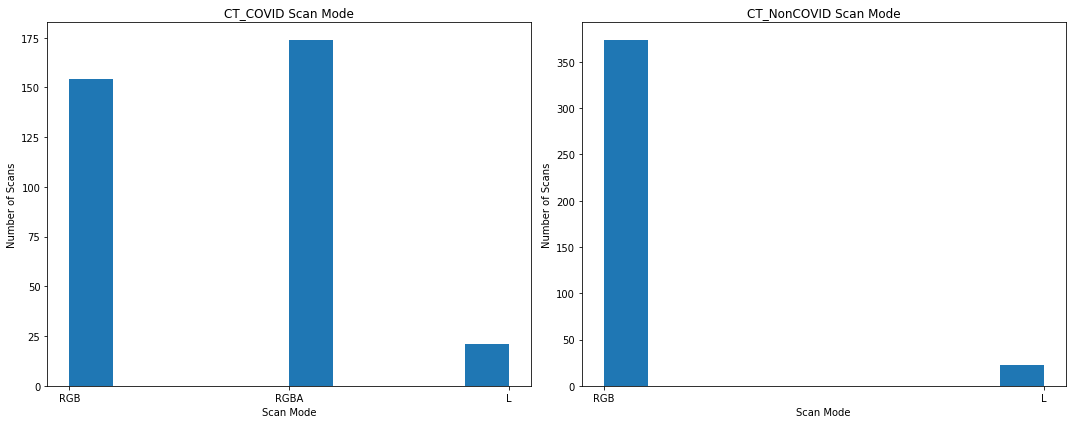

In [0]:
import matplotlib.pyplot as plt

#create subplots for both covid and noncovid data
fig, ax = plt.subplots(1, 2, tight_layout=True,figsize=(15,6))

#iterate through each dataframe and plot data
plot_number = 0
for metadata in df_map.keys():
    
    #plot data
    data = df_map[metadata]['Mode']
    ax[plot_number].hist(data)
    
    
    #set plot title
    title = metadata + " Scan Mode"
    ax[plot_number].set_title(title)
    
    #next plot
    plot_number += 1
    
#set axes labels
for ax in ax.flat:
    ax.set(xlabel="Scan Mode", ylabel='Number of Scans')

#render plot
plt.show()

<h2>Visualize Scan Palette Across Datasets</h2>

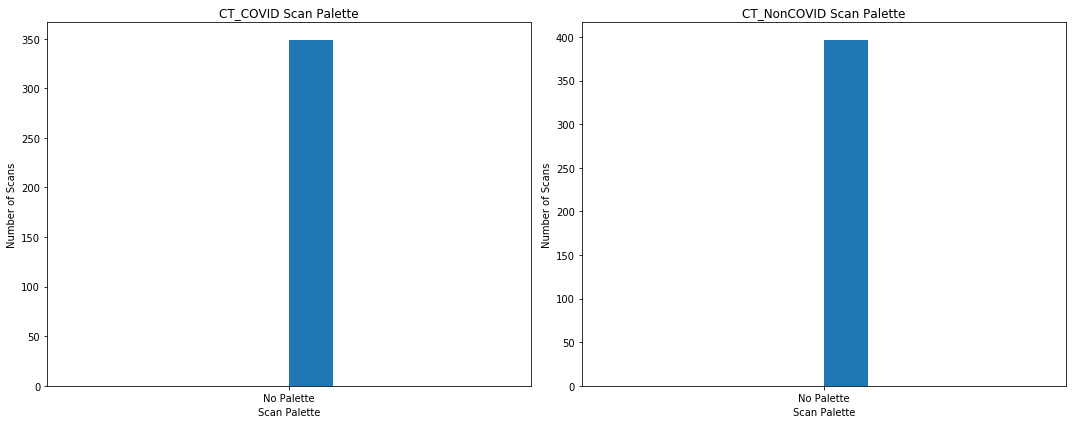

In [0]:
import matplotlib.pyplot as plt

#create subplots for both covid and noncovid data
fig, ax = plt.subplots(1, 2, tight_layout=True,figsize=(15,6))

#iterate through each dataframe and plot data
plot_number = 0
for metadata in df_map.keys():
    
    #plot data
    data = df_map[metadata]['Palette']
    #substitue nonetypes with informative strings
    data = ["No Palette" if not x else print() for x in data]
    ax[plot_number].hist(data)
    
    #set plot title
    title = metadata + " Scan Palette"
    ax[plot_number].set_title(title)
    
    #next plot
    plot_number += 1
    
#set axes labels
for ax in ax.flat:
    ax.set(xlabel="Scan Palette", ylabel='Number of Scans')

#render plot
plt.show()